## Import the dataset


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsa
from sklearn.metrics import accuracy_score

In [117]:
#Dataset is read 
df = pd.read_csv("FinalDataset_forSPP.csv")

In [118]:
#Dropping unwanted columns

#df.drop('HowYouPrepare',axis = 1, inplace = True)
#df.drop('Rate yourself',axis = 1, inplace = True)
#df.drop('TravelMethod',axis = 1, inplace = True)
#df.drop('Gender', axis = 1, inplace = True)

In [119]:
df

,TravelTime,PartTimeJob,Relationship,Father's_education,Mother's_education,StudyHours,AttendenceLecs,Concentrate,Friends,SocialMediaTime,extra curricular,StudyPattern,Marks
0,3,0,0,1,1,2,1,1,1,3,1,1,80 to 89
1,3,0,1,1,2,3,1,1,1,2,1,1,80 to 89
2,4,0,0,3,2,2,2,1,0,3,0,2,60 to 69
3,3,0,1,1,2,4,1,1,1,2,1,1,80 to 89
4,2,0,0,2,1,2,2,1,0,4,0,2,70 to 79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1,0,0,1,2,1,2,1,1,3,0,2,90 to 100
374,4,1,1,1,2,4,2,1,1,1,1,1,90 to 100
375,3,0,0,2,2,3,2,1,1,2,1,1,90 to 100
376,1,1,1,2,2,2,1,1,1,2,1,1,90 to 100


In [120]:
# Shape of the dataset -> no. of rows=378 & no. of columns=13 (with the mark column)
df.shape

(378, 13)

In [121]:
#Count of the dataset
df.count()

TravelTime            378
PartTimeJob           378
Relationship          378
Father's_education    378
Mother's_education    378
StudyHours            378
AttendenceLecs        378
Concentrate           378
Friends               378
SocialMediaTime       378
extra curricular      378
StudyPattern          378
Marks                 378
dtype: int64

In [122]:
#No null values where discovered
df.isnull().sum()

TravelTime            0
PartTimeJob           0
Relationship          0
Father's_education    0
Mother's_education    0
StudyHours            0
AttendenceLecs        0
Concentrate           0
Friends               0
SocialMediaTime       0
extra curricular      0
StudyPattern          0
Marks                 0
dtype: int64

## Visualization

In [123]:
#No. of data in each mark class
df["Marks"].value_counts()

80 to 89     42
60 to 69     42
70 to 79     42
90 to 100    42
20 to 29     42
50 to 59     42
0 to 20      42
40 to 49     42
30 to 39     42
Name: Marks, dtype: int64

<AxesSubplot:>

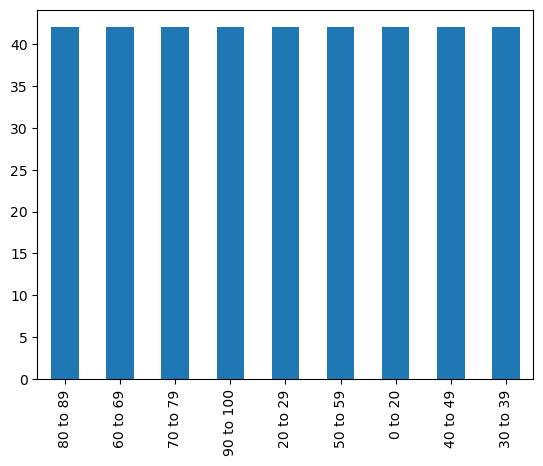

In [124]:
#Visualize count
df["Marks"].value_counts().plot.bar()

In [125]:
#Transpose
df.iloc[:,0:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TravelTime,378.0,2.883598,1.071549,1.0,2.0,3.0,4.0,4.0
PartTimeJob,378.0,0.431217,0.495903,0.0,0.0,0.0,1.0,1.0
Relationship,378.0,0.417989,0.493882,0.0,0.0,0.0,1.0,1.0
Father's_education,378.0,1.563492,0.593904,1.0,1.0,2.0,2.0,3.0
Mother's_education,378.0,1.798942,0.676862,1.0,1.0,2.0,2.0,3.0
StudyHours,378.0,2.272487,1.120030,1.0,1.0,2.0,3.0,5.0
AttendenceLecs,378.0,1.542328,0.573099,1.0,1.0,2.0,2.0,3.0
Concentrate,378.0,1.296296,0.561390,1.0,1.0,1.0,1.0,3.0
Friends,378.0,0.597884,0.490975,0.0,0.0,1.0,1.0,1.0
SocialMediaTime,378.0,2.568783,0.765142,1.0,2.0,3.0,3.0,4.0


<AxesSubplot:>

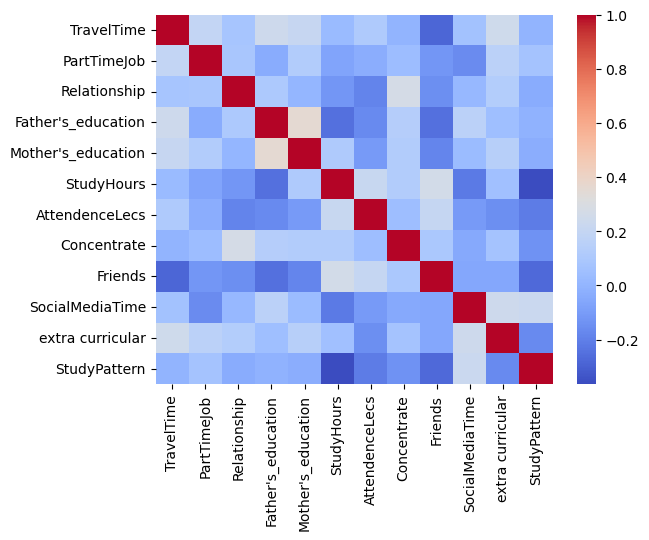

In [126]:
#Heatmap to see correlation

import seaborn as sns

sns.heatmap(df.corr(),cmap = 'coolwarm')

## Train/Test Split

In [127]:
# X and y columns added (X=columns of input, y=Output)
X = df.drop("Marks",axis = 1)
y = df["Marks"]

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3)

X_train.shape, X_test.shape

((264, 12), (114, 12))

In [129]:
from collections import Counter
print(Counter(y_train))


Counter({'20 to 29': 33, '0 to 20': 33, '40 to 49': 32, '80 to 89': 31, '50 to 59': 29, '30 to 39': 29, '90 to 100': 29, '60 to 69': 24, '70 to 79': 24})


## Decision Tree Classifier

In [130]:
from sklearn.tree import DecisionTreeClassifier

decisionModel = DecisionTreeClassifier()
decisionModel.fit(X_train,y_train)

decisionPred = decisionModel.predict(X_test)

decisionPred

array(['30 to 39', '30 to 39', '50 to 59', '60 to 69', '60 to 69',
       '50 to 59', '50 to 59', '50 to 59', '90 to 100', '90 to 100',
       '30 to 39', '50 to 59', '30 to 39', '40 to 49', '70 to 79',
       '40 to 49', '90 to 100', '30 to 39', '60 to 69', '90 to 100',
       '90 to 100', '0 to 20', '20 to 29', '60 to 69', '90 to 100',
       '90 to 100', '80 to 89', '60 to 69', '90 to 100', '40 to 49',
       '30 to 39', '90 to 100', '50 to 59', '80 to 89', '80 to 89',
       '90 to 100', '70 to 79', '80 to 89', '70 to 79', '20 to 29',
       '0 to 20', '40 to 49', '40 to 49', '0 to 20', '0 to 20',
       '90 to 100', '40 to 49', '20 to 29', '70 to 79', '90 to 100',
       '90 to 100', '90 to 100', '20 to 29', '20 to 29', '50 to 59',
       '60 to 69', '50 to 59', '60 to 69', '30 to 39', '70 to 79',
       '40 to 49', '60 to 69', '20 to 29', '30 to 39', '30 to 39',
       '20 to 29', '90 to 100', '80 to 89', '80 to 89', '80 to 89',
       '90 to 100', '90 to 100', '30 to 39', '50 to

In [131]:
#Accuracy of decision tree model
accuracy_score(y_test,decisionPred)

0.7719298245614035

In [132]:
pd.crosstab(y_test,decisionPred)

col_0,0 to 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100
Marks,,,,,,,,,
0 to 20,9,0,0,0,0,0,0,0,0
20 to 29,0,9,0,0,0,0,0,0,0
30 to 39,0,0,13,0,0,0,0,0,0
40 to 49,0,0,0,10,0,0,0,0,0
50 to 59,0,0,0,0,13,0,0,0,0
60 to 69,0,1,0,3,1,11,0,1,1
70 to 79,0,0,1,2,1,1,6,4,3
80 to 89,0,1,0,0,1,0,0,4,5
90 to 100,0,0,0,0,0,0,0,0,13


In [133]:
from sklearn.metrics import classification_report

print(classification_report(y_test,decisionPred))

              precision    recall  f1-score   support

     0 to 20       1.00      1.00      1.00         9
    20 to 29       0.82      1.00      0.90         9
    30 to 39       0.93      1.00      0.96        13
    40 to 49       0.67      1.00      0.80        10
    50 to 59       0.81      1.00      0.90        13
    60 to 69       0.92      0.61      0.73        18
    70 to 79       1.00      0.33      0.50        18
    80 to 89       0.44      0.36      0.40        11
   90 to 100       0.59      1.00      0.74        13

    accuracy                           0.77       114
   macro avg       0.80      0.81      0.77       114
weighted avg       0.81      0.77      0.75       114



## Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier

randForestModel = RandomForestClassifier()
randForestModel.fit(X_train, y_train)

randForestPred = randForestModel.predict(X_test)
randForestPred

array(['30 to 39', '30 to 39', '70 to 79', '60 to 69', '60 to 69',
       '50 to 59', '50 to 59', '50 to 59', '90 to 100', '80 to 89',
       '30 to 39', '50 to 59', '30 to 39', '40 to 49', '80 to 89',
       '40 to 49', '90 to 100', '30 to 39', '60 to 69', '90 to 100',
       '90 to 100', '0 to 20', '20 to 29', '60 to 69', '90 to 100',
       '90 to 100', '70 to 79', '60 to 69', '90 to 100', '40 to 49',
       '30 to 39', '90 to 100', '50 to 59', '80 to 89', '80 to 89',
       '90 to 100', '70 to 79', '70 to 79', '80 to 89', '20 to 29',
       '0 to 20', '40 to 49', '40 to 49', '0 to 20', '0 to 20',
       '90 to 100', '40 to 49', '20 to 29', '70 to 79', '90 to 100',
       '90 to 100', '90 to 100', '40 to 49', '20 to 29', '50 to 59',
       '60 to 69', '50 to 59', '60 to 69', '30 to 39', '70 to 79',
       '40 to 49', '60 to 69', '20 to 29', '30 to 39', '30 to 39',
       '20 to 29', '90 to 100', '80 to 89', '80 to 89', '80 to 89',
       '90 to 100', '90 to 100', '30 to 39', '70 to 

In [135]:
#Accuracy of random forest model
accuracy_score(y_test,randForestPred)

0.7807017543859649

In [136]:
pd.crosstab(y_test,randForestPred)

col_0,0 to 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100
Marks,,,,,,,,,
0 to 20,9,0,0,0,0,0,0,0,0
20 to 29,0,9,0,0,0,0,0,0,0
30 to 39,0,0,13,0,0,0,0,0,0
40 to 49,0,0,0,10,0,0,0,0,0
50 to 59,0,0,0,0,13,0,0,0,0
60 to 69,0,1,0,3,1,11,0,1,1
70 to 79,0,1,0,1,0,0,7,6,3
80 to 89,0,0,0,1,0,0,2,4,4
90 to 100,0,0,0,0,0,0,0,0,13


In [137]:
from sklearn.metrics import classification_report

print(classification_report(y_test,randForestPred))

              precision    recall  f1-score   support

     0 to 20       1.00      1.00      1.00         9
    20 to 29       0.82      1.00      0.90         9
    30 to 39       1.00      1.00      1.00        13
    40 to 49       0.67      1.00      0.80        10
    50 to 59       0.93      1.00      0.96        13
    60 to 69       1.00      0.61      0.76        18
    70 to 79       0.78      0.39      0.52        18
    80 to 89       0.36      0.36      0.36        11
   90 to 100       0.62      1.00      0.76        13

    accuracy                           0.78       114
   macro avg       0.80      0.82      0.79       114
weighted avg       0.81      0.78      0.77       114



## Support vector machine Classifier

In [138]:
from sklearn import svm

svm_model= svm.SVC(decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
svm_pred

array(['0 to 20', '30 to 39', '70 to 79', '70 to 79', '60 to 69',
       '50 to 59', '50 to 59', '50 to 59', '70 to 79', '90 to 100',
       '0 to 20', '50 to 59', '0 to 20', '40 to 49', '80 to 89',
       '40 to 49', '90 to 100', '30 to 39', '60 to 69', '90 to 100',
       '90 to 100', '0 to 20', '20 to 29', '60 to 69', '90 to 100',
       '90 to 100', '80 to 89', '60 to 69', '90 to 100', '40 to 49',
       '0 to 20', '90 to 100', '50 to 59', '80 to 89', '80 to 89',
       '80 to 89', '40 to 49', '40 to 49', '80 to 89', '20 to 29',
       '0 to 20', '40 to 49', '40 to 49', '0 to 20', '0 to 20',
       '90 to 100', '40 to 49', '20 to 29', '80 to 89', '90 to 100',
       '90 to 100', '90 to 100', '40 to 49', '20 to 29', '80 to 89',
       '80 to 89', '50 to 59', '50 to 59', '30 to 39', '40 to 49',
       '40 to 49', '80 to 89', '20 to 29', '30 to 39', '30 to 39',
       '20 to 29', '90 to 100', '40 to 49', '80 to 89', '80 to 89',
       '90 to 100', '90 to 100', '40 to 49', '70 to 79', 

In [139]:
accuracy_score(y_test,svm_pred)

0.5614035087719298

In [140]:
pd.crosstab(y_test,svm_pred)

col_0,0 to 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100
Marks,,,,,,,,,
0 to 20,9,0,0,0,0,0,0,0,0
20 to 29,0,8,0,1,0,0,0,0,0
30 to 39,5,0,6,2,0,0,0,0,0
40 to 49,0,0,0,9,0,0,0,1,0
50 to 59,0,0,0,1,10,0,0,2,0
60 to 69,0,1,0,4,3,4,1,4,1
70 to 79,0,0,0,6,0,0,2,8,2
80 to 89,0,0,0,1,0,0,1,4,5
90 to 100,0,0,0,0,0,0,0,1,12


In [141]:
from sklearn.metrics import classification_report

print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

     0 to 20       0.64      1.00      0.78         9
    20 to 29       0.89      0.89      0.89         9
    30 to 39       1.00      0.46      0.63        13
    40 to 49       0.38      0.90      0.53        10
    50 to 59       0.77      0.77      0.77        13
    60 to 69       1.00      0.22      0.36        18
    70 to 79       0.50      0.11      0.18        18
    80 to 89       0.20      0.36      0.26        11
   90 to 100       0.60      0.92      0.73        13

    accuracy                           0.56       114
   macro avg       0.66      0.63      0.57       114
weighted avg       0.68      0.56      0.53       114



## Ensemble Model

In [142]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


estimators_list = [('model1',decisionModel),('model2',randForestModel),('model3',svm_model)]

pipe = make_pipeline(StandardScaler(), StackingClassifier(estimators = estimators_list, final_estimator = LogisticRegression(max_iter=2000)))
                     
pipe.fit(X_train, y_train)

stackPred = pipe.predict(X_test)
stackPred


array(['30 to 39', '30 to 39', '80 to 89', '60 to 69', '60 to 69',
       '50 to 59', '50 to 59', '50 to 59', '90 to 100', '90 to 100',
       '30 to 39', '50 to 59', '30 to 39', '40 to 49', '70 to 79',
       '40 to 49', '90 to 100', '30 to 39', '60 to 69', '90 to 100',
       '90 to 100', '0 to 20', '20 to 29', '60 to 69', '90 to 100',
       '90 to 100', '80 to 89', '60 to 69', '90 to 100', '40 to 49',
       '30 to 39', '80 to 89', '50 to 59', '80 to 89', '80 to 89',
       '90 to 100', '80 to 89', '40 to 49', '70 to 79', '20 to 29',
       '0 to 20', '40 to 49', '40 to 49', '0 to 20', '0 to 20',
       '90 to 100', '40 to 49', '20 to 29', '80 to 89', '90 to 100',
       '70 to 79', '90 to 100', '40 to 49', '20 to 29', '50 to 59',
       '60 to 69', '50 to 59', '60 to 69', '30 to 39', '80 to 89',
       '40 to 49', '60 to 69', '20 to 29', '30 to 39', '30 to 39',
       '20 to 29', '90 to 100', '70 to 79', '80 to 89', '80 to 89',
       '90 to 100', '90 to 100', '30 to 39', '60 to 6

In [143]:
stackPredProba = pipe.predict_proba(X_test)

#9 classes were correctly predicted
stackPredProba.shape

(114, 9)

In [144]:
#Shape of the prediction
stackPred.shape

(114,)

In [145]:
accuracy_score(y_test,stackPred)

0.7368421052631579

In [146]:
pd.crosstab(y_test,stackPred)

col_0,0 to 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100
Marks,,,,,,,,,
0 to 20,9,0,0,0,0,0,0,0,0
20 to 29,0,9,0,0,0,0,0,0,0
30 to 39,0,0,13,0,0,0,0,0,0
40 to 49,0,0,0,9,0,0,0,1,0
50 to 59,0,0,0,0,13,0,0,0,0
60 to 69,0,1,0,3,1,11,2,0,0
70 to 79,0,0,0,1,0,2,3,10,2
80 to 89,0,0,0,1,0,1,1,4,4
90 to 100,0,0,0,0,0,0,0,0,13


In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test,stackPred))

              precision    recall  f1-score   support

     0 to 20       1.00      1.00      1.00         9
    20 to 29       0.90      1.00      0.95         9
    30 to 39       1.00      1.00      1.00        13
    40 to 49       0.64      0.90      0.75        10
    50 to 59       0.93      1.00      0.96        13
    60 to 69       0.79      0.61      0.69        18
    70 to 79       0.50      0.17      0.25        18
    80 to 89       0.27      0.36      0.31        11
   90 to 100       0.68      1.00      0.81        13

    accuracy                           0.74       114
   macro avg       0.75      0.78      0.75       114
weighted avg       0.73      0.74      0.71       114



## ROC Curve for Stacking ensemble model

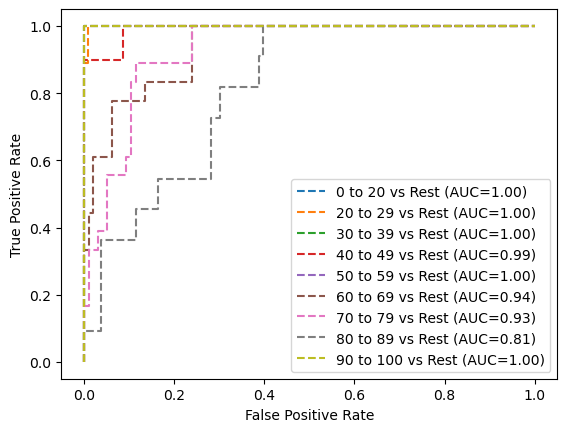

In [148]:
#Multiclass ROC curve - One vs Rest 
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
#binarizing the y_test values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

classes=np.unique(y_test)
n_class = classes.shape[0]


falsePositiveRate = {}
truePositiveRate = {}
threshold = {}

roc_auc = dict()


for i in range(n_class):
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test_binarized[:,i], stackPredProba[:,i])
    roc_auc[i] = auc(falsePositiveRate[i], truePositiveRate[i])
    
    #Plotting curve
    plt.plot(falsePositiveRate[i], truePositiveRate[i], linestyle="--",
            label = "%s vs Rest (AUC=%0.2f)"%(classes[i],roc_auc[i]))
    

plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Confusion Matrix

In [149]:
#Colors
from matplotlib.colors import ListedColormap

#Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, auc, roc_curve

modelNames = ["Decision Tree", "Random Forest", "Support Vector Machine", "Stacking (Ensemble method)"]

classifiers = [decisionModel, randForestModel, svm_model, pipe]

model = []
crossMatrixTable = pd.DataFrame(columns= model)

index = 0

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3)

for name, classifier in zip(modelNames, classifiers):
    modelPred = classifier.predict(X_test)
    crossMatrixTable.loc[index,'Classifiers'] = name
    crossMatrixTable.loc[index,'Train Accuracy'] = classifier.score(X_train, y_train)
    crossMatrixTable.loc[index,'Test Accuracy'] = accuracy_score(y_test,modelPred)
    crossMatrixTable.loc[index,'Precision'] = precision_score(y_test,modelPred,average= 'macro')
    crossMatrixTable.loc[index,'Recall'] = recall_score(y_test,modelPred,average= 'macro')
    crossMatrixTable.loc[index,'F1 Score'] = f1_score(y_test,modelPred,average= 'macro')
    index+=1

crossMatrixTable

,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.916667,0.912281,0.911972,0.903371,0.904073
1,Random Forest,0.924242,0.903509,0.914330,0.894824,0.897193
2,Support Vector Machine,0.719697,0.684211,0.785963,0.661369,0.635030
3,Stacking (Ensemble method),0.867424,0.833333,0.855423,0.825024,0.806892


## ROC Curve for Each Classifieer

## Cross Validation

In [150]:
from sklearn.model_selection import StratifiedKFold
#10 folds
kf = StratifiedKFold(n_splits= 10)
kf

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [151]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test,y_test)

In [152]:
scores_model = []

X = df.drop("Marks",axis = 1)
y = df["Marks"]


for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.loc[test_index]
    scores_model.append(get_score(pipe, X_train, X_test, y_train, y_test))


In [153]:
scores_model

[0.7631578947368421,
 0.631578947368421,
 0.868421052631579,
 0.7894736842105263,
 0.7368421052631579,
 0.8947368421052632,
 0.8157894736842105,
 0.8421052631578947,
 0.8378378378378378,
 0.8648648648648649]